In [1]:
import numpy as np
import h5py


fn = "image1-competition.hdf5"

with h5py.File(fn, "r") as f:
    data = np.array(f["data"])
    wns = np.array(f["wns"])
    tissue_mask = np.array(f["tissue_mask"])
    classes = np.array(f["classes"])

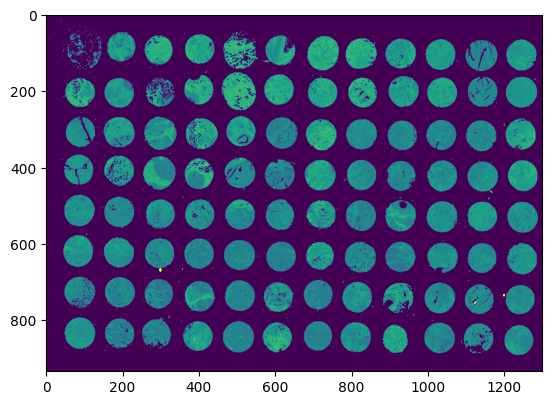

In [2]:
# display the whole image

import matplotlib.pyplot as plt

def nearest_ind(a, v):
    return np.abs(a - v).argmin()

im = data[:, :, nearest_ind(wns, 1560)]
plot = plt.imshow(im, vmin=0, vmax=1)

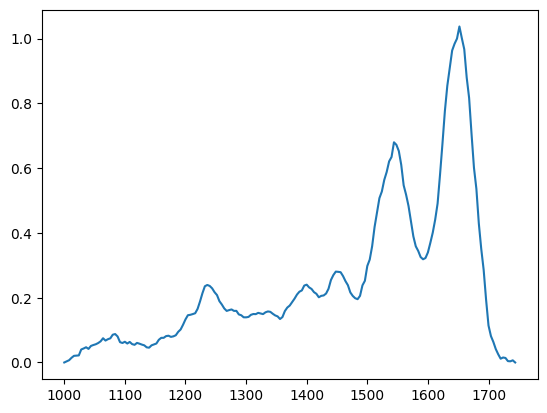

In [3]:
# a single "pixel" is a spectrum
plt.plot(wns, data[600, 200])
plt.show()

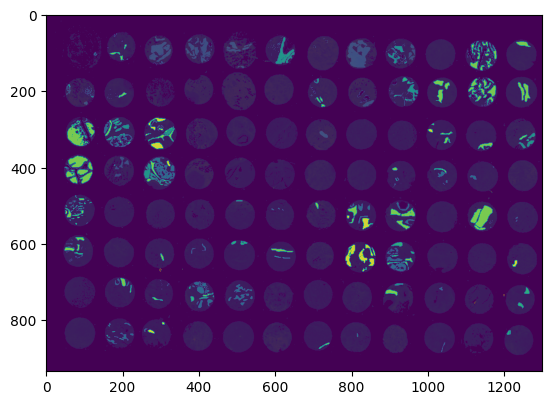

In [4]:
# the classes
plt.imshow(data[:, :, nearest_ind(wns, 1560)], vmin=0, vmax=1)
plt.imshow(classes[:, :], alpha=0.8)

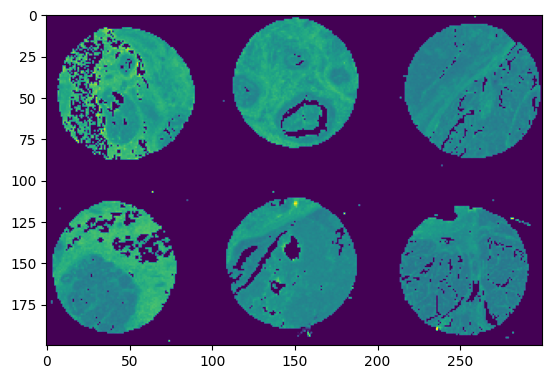

In [5]:
data_predict = data[265:465,360:660]
plt.imshow(data_predict[:, :, nearest_ind(wns, 1560)], vmin=0, vmax=1)

In [6]:
# Multinomial Logistic Regresion that disregards image coordinates

annotated_sel = classes != -1
X = data[annotated_sel]
y = classes[annotated_sel]

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

lr = LogisticRegression(max_iter=10000, C=0.001)
lr.fit(X, y)


LogisticRegression(C=0.001, max_iter=10000)

In [7]:
# take spectra for prediction in a linearized sequence
lin_data_predict = data_predict.reshape(-1, data_predict.shape[-1])
lin_data_predict = scaler.transform(lin_data_predict)

lin_pred = lr.predict_proba(lin_data_predict)
pred = lin_pred.reshape(data_predict.shape[:2] + lin_pred.shape[-1:])

with open("multilogreg.npy", "wb") as f:
    np.save(f, pred.astype(np.float32))

In [9]:
pred.shape

(200, 300, 6)

In [10]:
0.99**100

0.3660323412732292